In [18]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from datapreprocessfunction_code import function_process, readfile, rename_cols,annon,outers_join
%matplotlib inline

In [12]:
fig_size    = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [3]:
def remove_dup(strng):
    '''
     Input a string and split them 
    '''
    return ', '.join(list(dict.fromkeys(strng.split(', '))))

In [8]:
%store -r data_new

In [9]:
data_new

,gene_sym,cancer_driver,drug_target,triplex,promoter_methylated,negative_correlated_methylation,positive_correlated_methylation,risk_alelle_freq,EZH2,H3K27,types,cnv_exp_cor,Meth_Mean,logFC,Pathway,target,sphase_mean_FC,vaf,pathway_y
0,AC062028.1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,1.376536,unknown,unknown,0.0,0.273400,0
1,LINC00467,No,No,No,No,No,No,0.0,0.0,0.0,t,0.5647,0.0,0.815080,PI3K-Akt signaling pathway,unknown,0.0,0.238314,1
2,C1orf147,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.705599,unknown,unknown,0.0,0.000000,0
3,LINC01116,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.830010,"Cytokine-cytokine receptor interaction, Axon g...",unknown,0.0,0.000000,1
4,MIR4435-2HG,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,0.990965,"Cytokine-cytokine receptor interaction, Small ...",unknown,0.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,RBM5-AS1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-0.687609,"Rap1 signaling pathway, MAPK signaling pathway...",Yes,0.0,0.000000,1
2859,PACRG-AS1,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.961944,"Regulation of actin cytoskeleton, Axon guidance",unknown,0.0,0.000000,1
2860,LINC01230,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-4.454476,"Small cell lung cancer, cGMP-PKG signaling pat...",unknown,0.0,0.000000,1
2861,AL645929.2,No,No,No,No,No,No,0.0,0.0,0.0,unknown,0.0000,0.0,-1.030154,unknown,unknown,0.0,0.000000,0


In [10]:
data_new['target'].fillna('unknown',inplace=True)
data_new['sphase_mean_FC'].fillna(0,inplace=True)
data_new['vaf'].fillna(0,inplace=True)

In [11]:
data_new['EZH2'].fillna(0,inplace=True)
data_new['EZH2'].fillna(0,inplace=True)

In [12]:
data_new.drop(['gene_sym'],axis=1,inplace=True)

In [13]:
mutations_BRCA_agg_clin = data_new
mutations_BRCA_agg_clin.SNPS

AttributeError: 'DataFrame' object has no attribute 'SNPS'

<AxesSubplot:ylabel='pathway_y'>

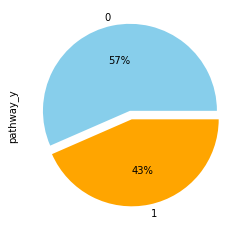

In [14]:
mutations_BRCA_agg_clin.pathway_y.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'],
                                                      explode=(0.05, 0.05))

In [12]:
[col for col in common_de_new.columns if col not in cat]

NameError: name 'cat' is not defined

In [15]:
mutations_BRCA_agg_clin.dtypes

cancer_driver                       object
drug_target                         object
triplex                             object
promoter_methylated                 object
negative_correlated_methylation     object
positive_correlated_methylation     object
risk_alelle_freq                   float64
EZH2                               float64
H3K27                              float64
types                               object
cnv_exp_cor                        float64
Meth_Mean                          float64
logFC                              float64
Pathway                             object
target                              object
sphase_mean_FC                     float64
vaf                                float64
pathway_y                            int64
dtype: object

In [19]:
categorical_columns = ['cancer_driver', 'promoter_methylated',
 'triplex']
numerical_columns   = ['logFC','vaf','sphase_mean_FC']
output =['pathway_y']
for category in categorical_columns:
    mutations_BRCA_agg_clin[category] = mutations_BRCA_agg_clin[category].astype('category')
#convert the categorical columns to tensors.
# data in the four categorical columns into numpy arrays and then stack all the columns horizontally
vt = mutations_BRCA_agg_clin['cancer_driver'].cat.codes.values
#ty = mutations_BRCA_agg_clin['SNPS'].cat.codes.values
#rg = mutations_BRCA_agg_clin['positive_correlated_methylation'].cat.codes.values
#dt = mutations_BRCA_agg_clin['drug_target'].cat.codes.values
pm = mutations_BRCA_agg_clin['promoter_methylated'].cat.codes.values
tri = mutations_BRCA_agg_clin['triplex'].cat.codes.values
#sam = mutations_BRCA_agg_clin['sample'].cat.codes.values
#typ = mutations_BRCA_agg_clin['types'].cat.codes.values
#tar = mutations_BRCA_agg_clin['target'].cat.codes.values

categorical_data = np.stack([vt,pm,tri,], 1)
categorical_data[:10]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [20]:
mutations_BRCA_agg_clin.dtypes


cancer_driver                      category
drug_target                          object
triplex                            category
promoter_methylated                category
negative_correlated_methylation      object
positive_correlated_methylation      object
risk_alelle_freq                    float64
EZH2                                float64
H3K27                               float64
types                                object
cnv_exp_cor                         float64
Meth_Mean                           float64
logFC                               float64
Pathway                              object
target                               object
sphase_mean_FC                      float64
vaf                                 float64
pathway_y                             int64
dtype: object

In [21]:
#create a tensor from the aforementioned numpy array, 
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]


tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [22]:
numerical_data = np.stack([mutations_BRCA_agg_clin[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data

tensor([[ 1.3765,  0.2734,  0.0000],
        [ 0.8151,  0.2383,  0.0000],
        [ 0.7056,  0.0000,  0.0000],
        ...,
        [-4.4545,  0.0000,  0.0000],
        [-1.0302,  0.0000,  0.0000],
        [-1.2517,  0.0000,  0.0000]])

In [23]:
outputs = torch.tensor(mutations_BRCA_agg_clin[output].values).flatten()
outputs[:5]

tensor([0, 1, 0, 1, 1])

In [24]:
print(categorical_data.shape)
print(numerical_data.shape)

torch.Size([2863, 3])
torch.Size([2863, 3])


In [25]:
categorical_column_sizes = [len(mutations_BRCA_agg_clin[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(2, 1), (2, 1), (2, 1)]


In [32]:
total_records = 2863
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs       = outputs[:total_records-test_records]
test_outputs        = outputs[total_records-test_records:total_records]
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

2291
2291
2291
572
572
572


In [33]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)
        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols
        
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i
       #multilayer perceptron is used
        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        #embedding of the categorical columns takes place
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        #batch normalization of the numerical columns
        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x

In [34]:
numerical_train_data[1][2]

tensor(0.)

In [35]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 3, [200,100,50], p=0.4)
#print(model)
model(categorical_train_data, numerical_train_data)

tensor([[-1.3104, -1.0113, -1.8345],
        [-1.8797, -0.3089, -1.3514],
        [-0.7045,  0.6612,  0.0068],
        ...,
        [-0.4183, -1.0228, -0.1212],
        [-0.1984, -0.0695, -0.6171],
        [ 0.0750,  0.5999,  0.0119]], grad_fn=<AddmmBackward>)

In [36]:
loss_function = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr=0.001)

In [40]:
epochs = 300
aggregated_losses = []
for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.80359763
epoch:  26 loss: 0.76744699
epoch:  51 loss: 0.72853273
epoch:  76 loss: 0.69702154
epoch: 101 loss: 0.68152618
epoch: 126 loss: 0.65027636
epoch: 151 loss: 0.64244592
epoch: 176 loss: 0.63307345
epoch: 201 loss: 0.62901419
epoch: 226 loss: 0.61779994
epoch: 251 loss: 0.62026656
epoch: 276 loss: 0.61603141
epoch: 300 loss: 0.6133755445


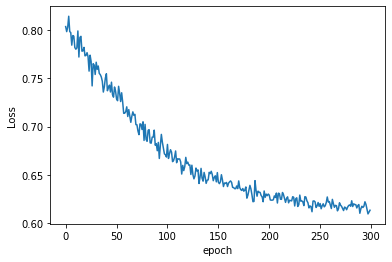

In [41]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [42]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')
y_val = np.argmax(y_val, axis=1)

Loss: 0.65190965


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[270  77]
 [134  91]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       347
           1       0.54      0.40      0.46       225

    accuracy                           0.63       572
   macro avg       0.60      0.59      0.59       572
weighted avg       0.62      0.63      0.62       572

0.6311188811188811


In [50]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

In [53]:
TP, FP, FN, TN = get_confusion_matrix_values(test_outputs,y_val)

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = accuracy_score(test_outputs, y_val)
logit_roc_auc

0.6311188811188811

In [49]:
confusion_matrix(test_outputs,y_val)

array([[270,  77],
       [134,  91]])

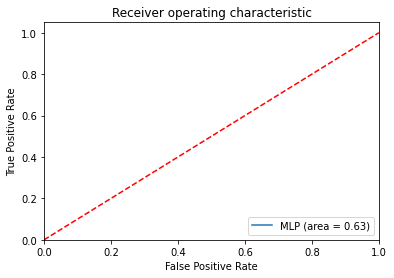

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
plt.figure()
plt.plot(FP, TP, label='MLP (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC_BRCA_correlation_pathways.png')
plt.show()